
## Actividad 


Objetivo

Analizar empíricamente cómo crece la incertidumbre en un movimiento browniano conforme aumenta el horizonte temporal y relacionarlo con el concepto de volatilidad en finanzas.

Al finalizar la actividad se espera que el estudiante comprenda que:

* La media del movimiento browniano permanece constante en cero.
* La varianza crece proporcionalmente al tiempo.
* La desviación estándar crece con la raíz del tiempo.
* El riesgo de un sistema aleatorio aumenta con el horizonte temporal.

 

Instrucciones generales

El objetivo de la actividad es construir desde cero una simulación de movimiento browniano y analizar cómo cambia su distribución final cuando se modifica el horizonte temporal.

No se proporciona código base. Cada estudiante debe implementar la simulación utilizando Python.

Se permite utilizar únicamente las librerías:

* numpy
* matplotlib


## Parte 1 — Simulación del proceso

1. Simular trayectorias de movimiento browniano estándar.

2. Utilizar al menos 5,000 simulaciones independientes.

3. Trabajar con los siguientes horizontes temporales:

   * T = 0.25
   * T = 0.5
   * T = 1
   * T = 2

4. Para cada horizonte temporal:

   * Discretizar el intervalo usando 252 pasos.
   * Generar incrementos normales con media cero.
   * Asegurar que la varianza escale correctamente con el tamaño del paso.
   * Calcular el valor final del proceso en el tiempo T.

El resultado debe ser un conjunto de valores finales para cada horizonte.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42) 
n_simulaciones = 5000
horizontes_T = [0.25, 0.5, 1, 2]
n_pasos = 252

resultados_finales = {}

for T in horizontes_T:
    dt = T / n_pasos

    incrementos = np.random.normal(0, np.sqrt(dt), size=(n_simulaciones, n_pasos))
 
    trayectorias = np.cumsum(incrementos, axis=1)
    
    valores_finales = trayectorias[:, -1]
    
    resultados_finales[T] = valores_finales


for T, valores in resultados_finales.items():
    print(f"Horizonte T = {T}:")
    print(f"  - Media de valores finales: {np.mean(valores):.4f} (Esperado: 0)")
    print(f"  - Varianza de valores finales: {np.var(valores):.4f} (Esperado: {T})")
    print("-" * 40)

Horizonte T = 0.25:
  - Media de valores finales: -0.0114 (Esperado: 0)
  - Varianza de valores finales: 0.2478 (Esperado: 0.25)
----------------------------------------
Horizonte T = 0.5:
  - Media de valores finales: 0.0057 (Esperado: 0)
  - Varianza de valores finales: 0.4864 (Esperado: 0.5)
----------------------------------------
Horizonte T = 1:
  - Media de valores finales: -0.0063 (Esperado: 0)
  - Varianza de valores finales: 0.9917 (Esperado: 1)
----------------------------------------
Horizonte T = 2:
  - Media de valores finales: 0.0178 (Esperado: 0)
  - Varianza de valores finales: 1.9264 (Esperado: 2)
----------------------------------------


## Parte 2 — Visualización

Construir una gráfica que muestre, en una misma figura:

* La distribución final del proceso para cada horizonte temporal.
* Utilizar histogramas superpuestos.
* Incluir leyenda y títulos adecuados.

La visualización debe permitir comparar claramente la dispersión de cada caso.

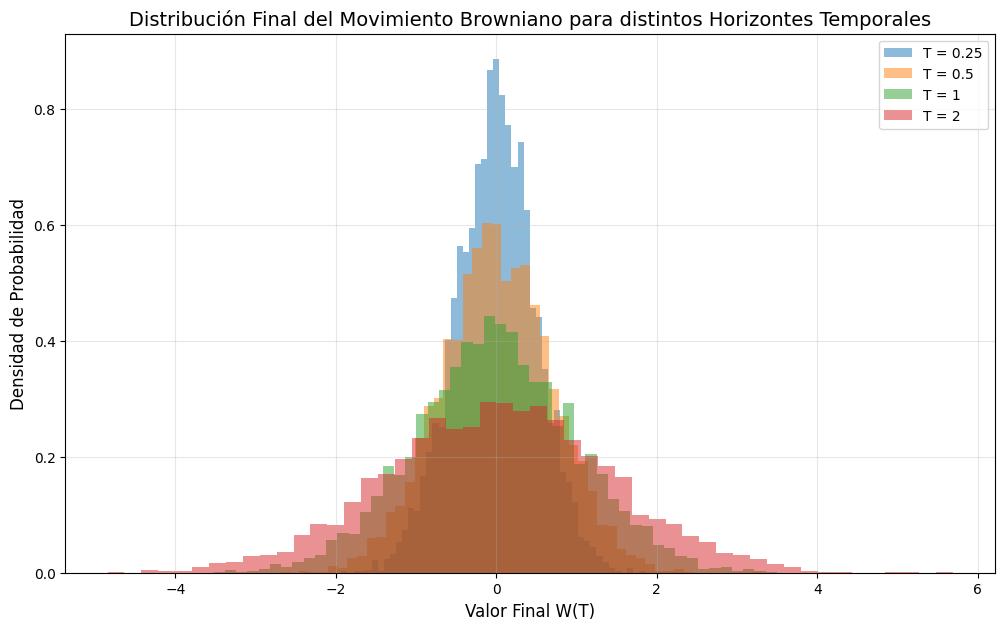

In [6]:
# Visualización
plt.figure(figsize=(12, 7))
for T in horizontes_T:
    plt.hist(resultados_finales[T], bins=50, alpha=0.5, label=f'T = {T}', density=True)

plt.title('Distribución Final del Movimiento Browniano para distintos Horizontes Temporales', fontsize=14)
plt.xlabel('Valor Final W(T)', fontsize=12)
plt.ylabel('Densidad de Probabilidad', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

## Parte 3 — Análisis cuantitativo

Para cada horizonte temporal calcular:

* Media empírica
* Varianza empírica
* Desviación estándar empírica

Presentar los resultados en una tabla.

In [7]:
lista_estadisticos = []
#Simulación y Cálculo de Métricas
for T in horizontes_T:
    # Definir el tamaño del paso
    dt = T / n_pasos
    
    incrementos = np.random.normal(0, np.sqrt(dt), size=(n_simulaciones, n_pasos))
    
    # Calcular el valor final W(T) sumando los incrementos de cada trayectoria
    valores_finales = np.sum(incrementos, axis=1)
# Calcular métricas empíricas
    media_e = np.mean(valores_finales)
    varianza_e = np.var(valores_finales)
    desviacion_e = np.std(valores_finales)
    
    # Guardar en la lista
    lista_estadisticos.append({
        'Horizonte (T)': T,
        'Media Empírica': media_e,
        'Varianza Empírica': varianza_e,
        'Desv. Estándar': desviacion_e
    })

# Data frame
df_resultados = pd.DataFrame(lista_estadisticos)

pd.options.display.float_format = '{:,.6f}'.format

print("Análisis Cuantitativo del Movimiento Browniano:")
print(df_resultados.to_string(index=False))

Análisis Cuantitativo del Movimiento Browniano:
 Horizonte (T)  Media Empírica  Varianza Empírica  Desv. Estándar
      0.250000       -0.005048           0.254733        0.504711
      0.500000        0.009434           0.494140        0.702951
      1.000000       -0.001154           1.011530        1.005748
      2.000000       -0.003643           1.963748        1.401338


## Parte 4 — Preguntas de análisis

Responder de forma breve y precisa, usando Markdown en el notebook:

**1. ¿Cómo cambia la dispersión de la distribución al aumentar el horizonte temporal?** La dispersión aumenta conforme el horizonte temporal crece.

**2. ¿La media del proceso depende del tiempo?** No, la media no depende del tiempo. Teóricamente, el movimiento browniano estándar tiene una esperanza $E[W_T] = 0$ para cualquier $T$. En los datos, observamos que aunque los valores fluctúan levemente debido al azar de la simulación (p. ej., -0.011 o 0.017), siempre se mantienen cercanos a cero, independientemente de si el horizonte es corto o largo.

**3. ¿Qué relación observas entre la varianza y el tiempo?** Existe una relación lineal directa. La varianza crece de manera proporcional al tiempo y conforme al horizonte.

**4. Si el horizonte temporal se cuadruplica, ¿qué ocurre aproximadamente con la desviación estándar?** Si el tiempo se cuadruplica ($T \times 4$), la desviación estándar se duplica. Esto se debe a que la desviación estándar es la raíz cuadrada del tiempo ($\sigma = \sqrt{T}$).

**5. ¿Qué implicaciones tiene este comportamiento para el riesgo financiero a distintos horizontes?** Mayor incertidumbre a largo plazo, margen de error, por ejemplo es mucho más difícil predecir el precio de un activo a un año que a un día, ya que el abanico de posibilidades (la dispersión) es significativamente mayor.

